In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
plt.style.use('dark_background')
np.set_printoptions(suppress=True)

In [63]:
df = yf.download("AAPL",period="max")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100764,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095508,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088498,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090688,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093317,73449600
...,...,...,...,...,...,...
2022-09-12,159.589996,164.259995,159.300003,163.429993,163.429993,104956000
2022-09-13,159.899994,160.539993,153.369995,153.839996,153.839996,122656600
2022-09-14,154.789993,157.100006,153.610001,155.309998,155.309998,87965400


In [64]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100764,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095508,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088498,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090688,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093317,73449600
...,...,...,...,...,...,...,...
10525,2022-09-12,159.589996,164.259995,159.300003,163.429993,163.429993,104956000
10526,2022-09-13,159.899994,160.539993,153.369995,153.839996,153.839996,122656600
10527,2022-09-14,154.789993,157.100006,153.610001,155.309998,155.309998,87965400
10528,2022-09-15,154.649994,155.240005,151.380005,152.369995,152.369995,90481100


In [65]:
df.index = df.pop('Date')

In [66]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100764,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095508,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088498,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090688,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093317,73449600
...,...,...,...,...,...,...
2022-09-12,159.589996,164.259995,159.300003,163.429993,163.429993,104956000
2022-09-13,159.899994,160.539993,153.369995,153.839996,153.839996,122656600
2022-09-14,154.789993,157.100006,153.610001,155.309998,155.309998,87965400


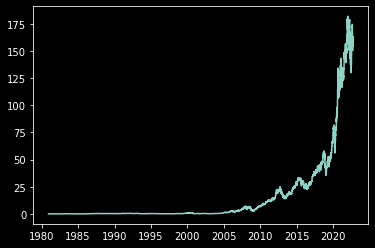

In [67]:
plt.plot(df.index, df.Close)

In [68]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [69]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

In [70]:
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-08-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,123.389999,122.540001,120.089996,120.589996
1,2021-03-26,122.540001,120.089996,120.589996,121.209999
2,2021-03-29,120.089996,120.589996,121.209999,121.389999
3,2021-03-30,120.589996,121.209999,121.389999,119.900002
4,2021-03-31,121.209999,121.389999,119.900002,122.150002
...,...,...,...,...,...
352,2022-08-17,172.100006,173.190002,173.029999,174.550003
353,2022-08-18,173.190002,173.029999,174.550003,174.149994
354,2022-08-19,173.029999,174.550003,174.149994,171.520004
355,2022-08-22,174.550003,174.149994,171.520004,167.570007


In [71]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((357,), (357, 3, 1), (357,))

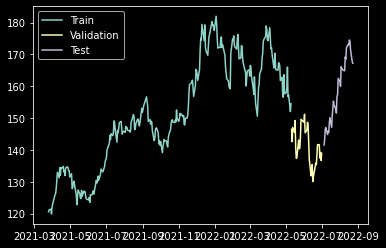

In [72]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
9/9 [==============================] - 5s 143ms/step - loss: 23297.0020 - mean_absolute_error: 151.7476 - val_loss: 19998.2500 - val_mean_absolute_error: 141.3012
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 23147.4629 - mean_absolute_error: 151.2528 - val_loss: 19861.7090 - val_mean_absolute_error: 140.8171
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 22992.8184 - mean_absolute_error: 150.7389 - val_loss: 19702.1328 - val_mean_absolute_error: 140.2494
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 22797.5078 - mean_absolute_error: 150.0902 - val_loss: 19488.8301 - val_mean_absolute_error: 139.4869
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 22551.3691 - mean_absolute_error: 149.2676 - val_loss: 19238.4277 - val_mean_absolute_error: 138.5863
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 22235.4922 - mean_absolute_error: 148.2033 - val_loss: 1885

9/9 [==============================] - 1s 2ms/step


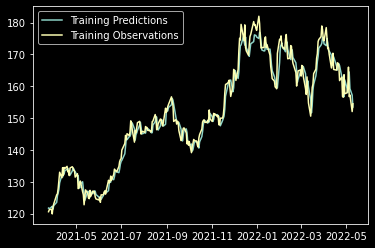

In [74]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 3ms/step


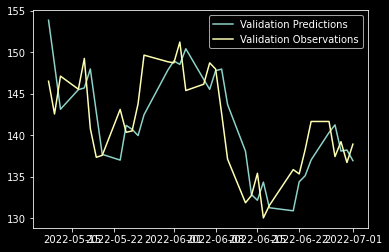

In [75]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


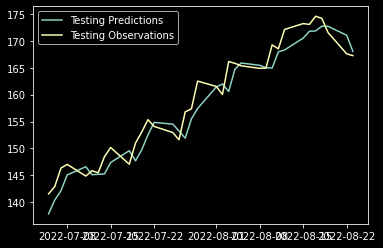

In [76]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

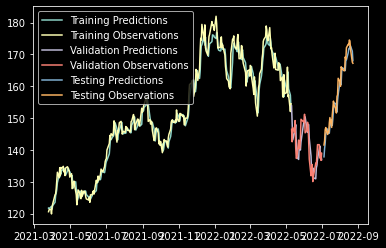

In [77]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [82]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = dates_test[0:]
last_window  = X_test[0]

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    new_window = list(last_window[1:])
    new_window.append(next_prediction)
    new_window = np.array(new_window)
    last_window = new_window

1/1 [==============================] - 0s 28ms/step


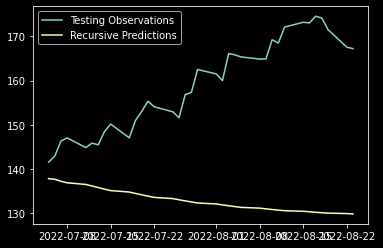

In [83]:
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend([
            'Testing Observations',
            'Recursive Predictions'])